In [ ]:
## Clone transformers library
# !pip install git+https://github.com/huggingface/transformers
!pip install -q peft  accelerate bitsandbytes safetensors

In [ ]:
import transformers
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

device = "cuda" # the device to load the model onto

## load bnb configuration
bnb_config = transformers.BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

model = AutoModelForCausalLM.from_pretrained("mistralai/Mistral-7B-Instruct-v0.2",
                                             load_in_4bit=True,
    torch_dtype=torch.bfloat16,
    quantization_config=bnb_config,
    device_map='auto')
tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-Instruct-v0.2")

tokenizer.bos_token_id = 1

stop_token_ids = [0]




model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

NameError: ignored

In [ ]:
model_name = "mistralai/Mistral-7B-Instruct-v0.2"
print(f"Successfully loaded the model {model_name} into memory")

Successfully loaded the model mistralai/Mistral-7B-Instruct-v0.2 into memory


In [ ]:

text = "[INST] Tell a recipe of palak paneer in hindi [/INST]"

encoded = tokenizer(text, return_tensors="pt", add_special_tokens=False)
model_input = encoded
# model.to(device)
generated_ids = model.generate(**model_input, max_new_tokens=200, do_sample=True)
decoded = tokenizer.batch_decode(generated_ids)
print(decoded[0])

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1665: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.generate()`.
  warnings.warn(


[INST] Tell a recipe of palak paneer in hindi [/INST] मेरा आपको पालक पनीर के लिये यह टिप्स दिलाता हूँ:

 Ingredients: (Ek sabji ka vaqt prateeksha karein)
1. 250 gm Paneer (पनीर) - cubed
2. 500 gm Spinach (पलक) - washed and chopped
3. 5-6 cloves Garlic (लेसन) - minced
4. 2 small-sized Onions (प्याज) - chopped
5. 1 tsp Cumin seeds (जीरह)
6. 1 tbspGinger-garlic paste (अधूध लेसन-अदरक)



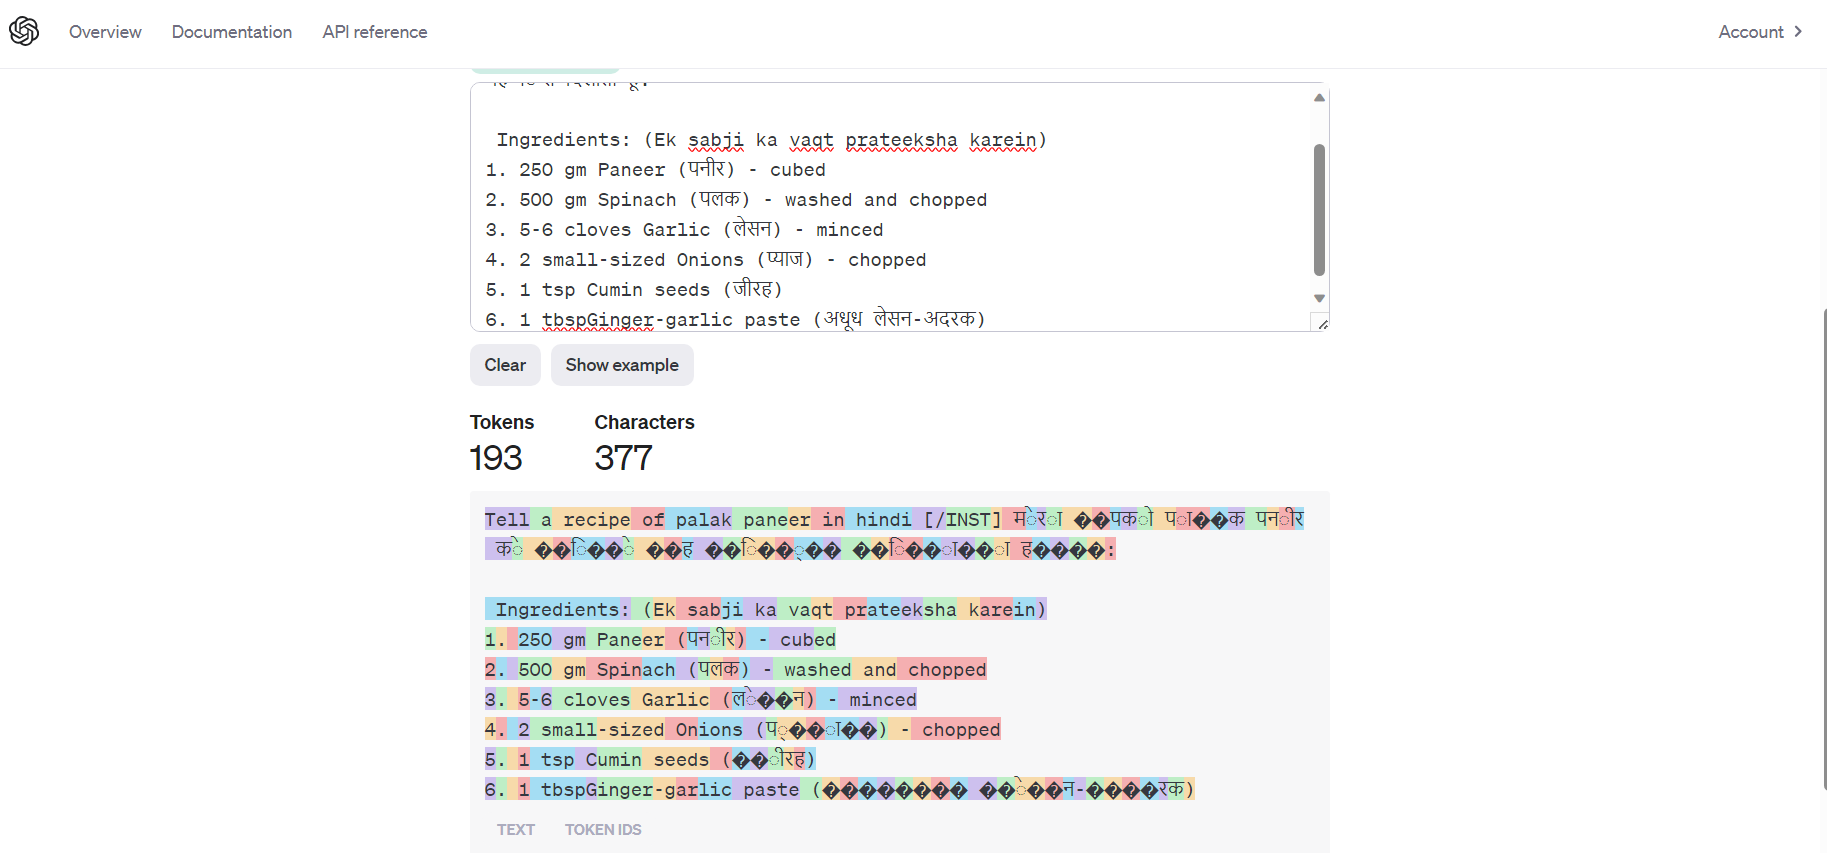

In [ ]:
print(decoded[0])

['[INST] Tell a recipe of palak paneer in hindi [/INST] मेरा आपको पालक पनीर के लिये यह टिप्स दिलाता हूँ:\n\n Ingredients: (Ek sabji ka vaqt prateeksha karein)\n1. 250 gm Paneer (पनीर) - cubed\n2. 500 gm Spinach (पलक) - washed and chopped\n3. 5-6 cloves Garlic (लेसन) - minced\n4. 2 small-sized Onions (प्याज) - chopped\n5. 1 tsp Cumin seeds (जीरह)\n6. 1 tbspGinger-garlic paste (अधूध लेसन-अदरक)\n']


In [ ]:

text = "[INST] Tell a recipe of palak paneer. First right it in english and then right in hindi [/INST]"

encoded = tokenizer(text, return_tensors="pt", add_special_tokens=False)
model_input = encoded
# model.to(device)
generated_ids = model.generate(**model_input, max_new_tokens=2000, do_sample=True)
decoded = tokenizer.batch_decode(generated_ids)
print(decoded[0])

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


[INST] Tell a recipe of palak paneer. First right it in english and then right in hindi [/INST] English Recipe for Palak Paneer:

Ingredients:
- 250 gms paneer (Indian cottage cheese), cubed
- 500 gms spinach (palak)
- 2 tbsp ghee or oil
- 1 tsp cumin seeds (jeera)
- 1 small onion, finely chopped
- 2-3 green chilies, finely chopped
- 1 inch ginger, finely chopped
- 2 garlic cloves, minced
- 1 tbsp cashews, soaked in water for 20 minutes
- 2 tbsp grated paneer
- 1 tsp turmeric powder (haldi)
- 1 tsp red chili powder (laal mirch)
- 1 tsp garam masala
- Salt, to taste
- Water, as needed

Instructions:
1. In a large pot, bring water to a boil and add spinach. Blanch the spinach for a few minutes, then remove it from the water using a strainer. Do not squeeze the excess water. Keep it aside.
2. Heat ghee or oil in a pan on medium heat. Once hot, add cumin seeds and let them splutter.
3. Add chopped onion and sauté until it turns translucent.
4. Add green chilies, ginger, and garlic. Sauté f

In [ ]:

text = "[INST] Write an essay about natural diversty of india in hindi [/INST]"

encoded = tokenizer(text, return_tensors="pt", add_special_tokens=False)
model_input = encoded
# model.to(device)
generated_ids = model.generate(**model_input, max_new_tokens=1500, do_sample=True)
decoded = tokenizer.batch_decode(generated_ids)
print(decoded[0])

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


[INST] Write an essay about natural diversty of india in hindi [/INST] प्रथम पथ पर, सामग्री के लिए हिन्दी में प्यारित रहे दोनों पत्रकार । हमें आज भारत देश के पत्थर पर नातュरल विनड़ों का बहुमूल्य विविधता बताएंगे । साथ हेतु, हिंदी लिखे जाते हुए यह एसे आय ई।

पहले आगे, भारत एक विकासशाली, समुंदरी एवं वन्याजनीय राष्ट्र है। यह एक विकासशक्ति शालिन राश्त्र जहां स्वतंत्रता, चुनावी जेनारलीजी और सामुद Ayयंतaraचूडांवर संगतियों के साथ-साथ विविध साहित्य, संगीत, रास्त्रीय एवं साधनों वाले सभी प्रकार के समुक्मरित संग्rah बनाते रहते है। यदि आप एक सेकुलर पत्थर देखें तो वह प्रकार द्वारा भारत का संदेश पंजीर पहुँचाता है कि उसदेश को विविध मानवी सहकारियों और व्यक्तित्वों के निकट बाहर पहुंचने, जीवन के सभी असलियों को उठाने और सम्पूर्णता से जीवन शासन के लिए बहुत ज़िम्दे विदेश है।

पर अब आगे, यदि आप उसे विस्तार वाला दिखावादेश के साथ टूक, सहयाद्री और पहाड़ियों, गन्धर्वों और वहना के साथ साथ भी आकार दिखाएं, तो वह प्रतीब प्रकार भी प्रदर्शित करता है। रत्नवती हिमालय, स्नैंछया हिमालय, धनुषकोटी, वैद्याश्वर, मक्कलिदेश, निल

Tokens According to gpt3.5

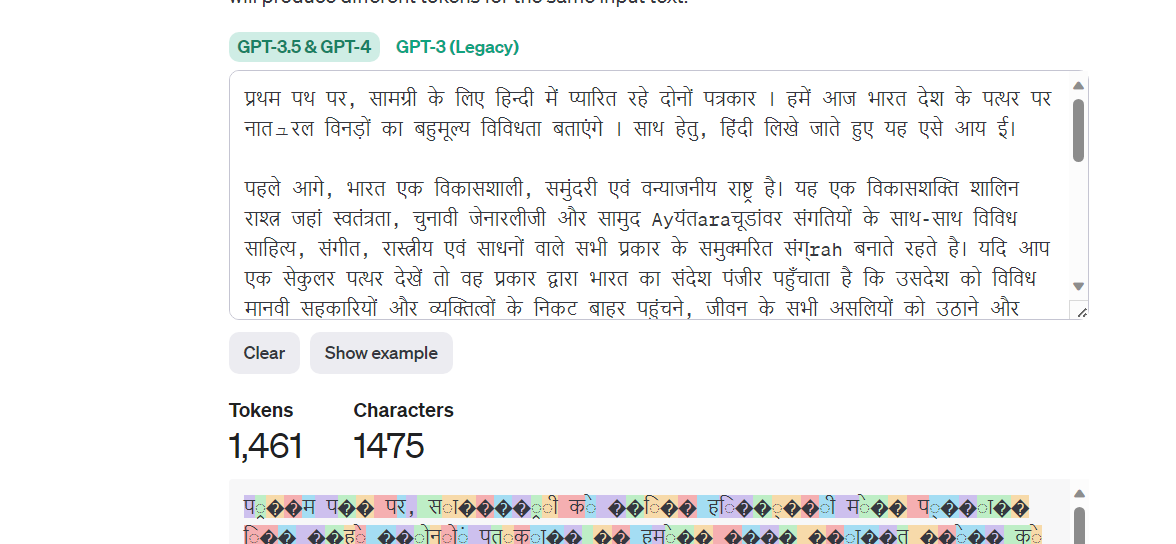

In [ ]:

text = "[INST] Write a conversation between harry potter and hanuman[/INST]They both discuss devotion. Hanuman expresses his love for Lord Ram , Harry potter expresses his love for parents.Write in Hindi [/INST]"

encoded = tokenizer(text, return_tensors="pt", add_special_tokens=False)
model_input = encoded
# model.to(device)
generated_ids = model.generate(**model_input, max_new_tokens=2000, do_sample=True)
decoded = tokenizer.batch_decode(generated_ids)
print(decoded[0])

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


[INST] Write a conversation between harry potter and hanuman.They both discuss devotion. Hanuman expresses his love for Lord Ram , Harry potter expresses his love for parents.Write in Hindi [/INST] हर ry पوटर (Harry Potter): Hanuman Ji, आपके साथ बैंकपURुष को सवाल ḍāl rahā hūṇ. (I have a question for you, Hanuman.)

हनुमानजी (Hanumanji): सिर्फ सवाल, Potter Bhaiyā. (Just a question, Harry.)

हर ry पوटर: आपलोग उपदेशाओं के साथ रहने से हर साझ़े दिन तक राम जी से भक्ती किताब़ूँ दिखाते रहते हैं. (For all these years that you've lived with your gurus, you've continuously shown devotion to Lord Ram.)

हनुमानजी: हाथ में रम राम जी का स्वामी हुआ हमें वह अपनी इच्�� chronic अधूरी जीवन से बिन्तु है. (Lord Ram is our master, forever etched in our hearts from this long life.)

हर ry पोटर: है, हanumanji, आपके उन्मेद्नाथ शिरोमानियों के साथ रहने से हमेशा आपकी भक्ती रसकार मिलती हुई देखता हूँ. (Yes, Hanumanji, your devotion towards Lord Ram is inspiring, and it comes from living with your gurus.)

हनुमानजी: 

In [ ]:
## The chat prompt template for mistral 7B
text = [
     {
          "role":"user","content": "Write a conversation between harry potter and hanuman.They both discuss devotion. Hanuman expresses his love for Lord Ram , Harry potter expresses his love for parents.Write in Hindi"
          }
     ]

encoded = tokenizer.apply_chat_template(text, tokenize=False)
# model_input = encoded
# # model.to(device)
# generated_ids = model.generate(**model_input, max_new_tokens=2000, do_sample=True)
# decoded = tokenizer.batch_decode(generated_ids)
# print(decoded[0])
print(encoded)

<s>[INST] Write a conversation between harry potter and hanuman.They both discuss devotion. Hanuman expresses his love for Lord Ram , Harry potter expresses his love for parents.Write in Hindi [/INST]
